In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get the data
url = 'http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat'
df_origin = pd.read_csv(url, encoding="latin1",skiprows=20, sep="\s+")

In [3]:
# normalize it
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(df_origin)
df = scaler.transform(df_origin)

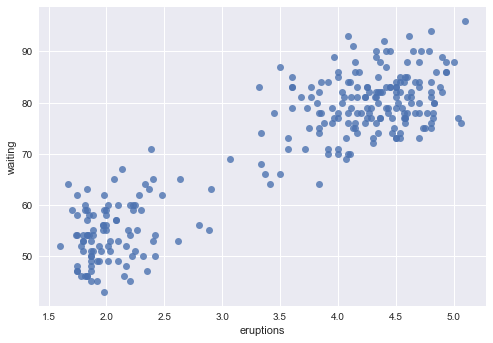

In [4]:
# Visualize data-set
sns.regplot(x=df_origin["eruptions"], y=df_origin["waiting"], fit_reg=False)
plt.show()

In [5]:
# implement k-means

#1. Generate k-cluster-centers in certain range
def generate_cluster_centers(k, df):
    # get x and y limits
    x_min = np.min(df[:, 0])
    x_max = np.max(df[:, 0])
    y_min = np.min(df[:, 1])
    y_max = np.max(df[:, 1])
    clusters = []
    for i in range(k):
        x_val = np.random.uniform(x_min, x_max)
        y_val = np.random.uniform(y_min, y_max)
        clusters.append([x_val, y_val])
    clusters = np.asarray(clusters)
    return clusters

In [6]:
def assign_label(element, cluster_centers):
    # Calculate eucledian distance
    dist = eucledian_distance(element, cluster_centers)
    return dist.argsort()[0] # return label of closest cluster_center

In [7]:
def eucledian_distance(element, cluster_centers):
    dist = pow((cluster_centers - element),2)
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    return dist

In [8]:
def update_clusters(df, label, cluster_center):
    # get data belonging to a cluster
    data_with_labels = pd.DataFrame(np.hstack((df, np.column_stack(label).T)))
    columns = ["eruption", "waiting", "label"]
    data_with_labels.columns = columns
    
    for i, center in enumerate(cluster_center):
        data = data_with_labels[['eruption', 'waiting']][data_with_labels.label==i]
        if(len(data) == 0):
            x_val = 0
            y_val = 1
        else:    
            x_val = sum(data.eruption.values) / len(data)
            y_val = sum(data.waiting.values) / len(data)
        cluster_center[i] = [x_val, y_val]
        
    return cluster_center    

In [9]:
def k_means(k, df, maxit=1000):
    #set up
    old_labels = [1 for i in range(len(df))]
    converged= False
    num_iterations = 0
    clusters = generate_cluster_centers(k, df)
    
    while not converged:
        label = []
        if num_iterations != 0:
            clusters = update_clusters(df, old_labels, clusters)
        # Need to recompute cluster-centers based on labels!
        for element in df:
            label.append(assign_label(element, clusters))
        if old_labels == label:
            if sum(label) != 0 and sum(label) != len(df):
                converged = True
        else:
            old_labels = label
            num_iterations += 1
            
        if num_iterations == maxit:
            return np.asarray(label), clusters
        
    return np.asarray(label), clusters

In [10]:
def get_WSS(df, label, cluster_center):
    data_with_labels = pd.DataFrame(np.hstack((df, np.column_stack(label).T)))
    columns = ["eruption", "waiting", "label"]
    data_with_labels.columns = columns
    
    wss = []
    
    for i, center in enumerate(cluster_center):
        # Get data belonging to cluster_center
        data = data_with_labels[['eruption', 'waiting']][data_with_labels.label==i]
        
        # Calculate clusters wss
        cluster_wss = sum(eucledian_distance(center, data))
        wss.append(cluster_wss)
    
    return sum(wss)

In [11]:
x_min = np.min(df[:, 0])
x_max = np.max(df[:, 0])
y_min = np.min(df[:, 1])
y_max = np.max(df[:, 1])

x_1 = (x_min + x_max) / 2
y_1 = (y_min + y_max) / 2

In [12]:
wss_values = []
# get value for cluster = 1 as the functions breaks for k = 1
wss_1 = sum(eucledian_distance([x_1, y_1], df))
wss_values.append(wss_1)

for i in range(2, 10, 1):
    label, center = k_means(i+1, df)
    wss = get_WSS(df, label, center)
    wss_values.append(wss)

plt.plot(np.arange(1,10,1), wss_values)



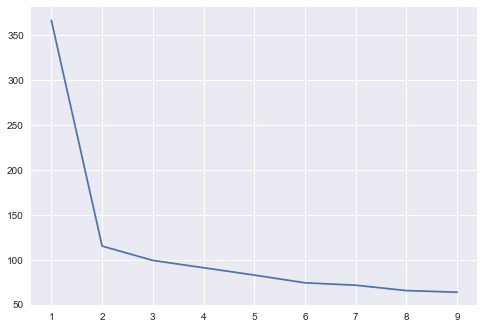

In [13]:
plt.show()